# Types of ML

```{figure} https://vitalflux.com/wp-content/uploads/2020/12/mind_map_machine_learning_3.jpg
:align: center
```

## Supervised Learning

```{image} https://cdn-images-1.medium.com/max/1600/1*Iz7bCLrPTImnBDOOEyE3LA.png
:alt: supervised-learning
:class: bg-primary mb-1
:width: 500px
:align: center
```

In supervised learning, the model is trained on a labeled dataset, meaning each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs so that the model can predict labels for unseen data.

<!--
To avoid such problems with loss {eq}`binary-cross-entropy` models usually predict numbers from $(0, 1)$, which are interpreted as probabilities of class $1$.
-->

<!--
**Multiclass classification**

```{image} https://miro.medium.com/max/1400/1*JAXmOAImcf683aXaBDPPVg.jpeg
:alt: multiclass
:class: bg-primary mb-1
:width: 500px
:align: center
```

* $\mathcal Y = \{1, 2, \ldots, K\}$ 
* one-hot encoding: $\boldsymbol y_i \in \{0, 1\}^K$, $\sum\limits_{k=1}^K y_{ik} = 1$
* $\hat{\boldsymbol y}_i = f_{\boldsymbol \theta}(\boldsymbol x_i) \in [0, 1]^K$ is now the vector of probabilities of belonging to class $k$: 

    $$
        \hat y_{ik} = \mathbb P(\boldsymbol x_i \in \text{ class }k)
    $$
    
* the cross-entropy loss is now written as follows:

```{math}
:label: cross-entropy
\mathcal L(\boldsymbol \theta) = -\frac 1n \sum\limits_{i=1}^n \sum\limits_{k=1}^Ky_{ik} \log(\hat y_{ik})
```

```{admonition} Example
Classifying into $3$ classes, model produces the following outputs:

|$y$ | $\boldsymbol {\hat y}$|
|:---:|:-------------------:|
|$0$| $(0.25, 0.4, 0.35)$  |
|$0$| $(0.5, 0.3, 0.2)$  |
|$1$| $\big(\frac 12 - \frac 1{2\sqrt 2}, \frac 1{\sqrt 2}, \frac 12 - \frac 1{2\sqrt 2}\big)$  |
|$2$| $(0, 0, 1)$  |

Calculate the cross-entropy loss {eq}`cross-entropy`. Assume that log base is $2$.
```
<span style="display:none" id="cross_entropy_loss">W3sicXVlc3Rpb24iOiAiQ2FsY3VsYXRlIHRoZSBjcm9zcyBlbnRyb3B5IGZyb20gdGhlIHByZXZpb3VzIGV4YW1wbGUiLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMC44NzUsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkV4YWN0bHkhIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIkluY29ycmVjdCJ9XX1d</span>
-->

In [2]:
# display_quiz("#cross_entropy_loss")

<!--
### Regression

* $\mathcal Y = \mathbb R$ or $\mathcal Y = \mathbb R^m$
* the common choice is the quadratic loss 

    $$
        \ell_2(y, \hat y) = (y - \hat y)^2
    $$
* then the overall loss function — mean squared error:

    $$
    \mathcal L(\boldsymbol \theta) = \mathrm{MSE}(\boldsymbol \theta) = \frac 1n\sum\limits_{i=1}^n (y_i - f_{\boldsymbol \theta}(\boldsymbol x_i))^2
    $$

If the function $f_{\boldsymbol \theta}(\boldsymbol x_i) = \boldsymbol {\theta^\top x}_i + b$ is linear, then the model is called **linear regression**.

Example of one-dimensional linear regression (figure 1.5 from {cite:p}`pml1Book`):
-->

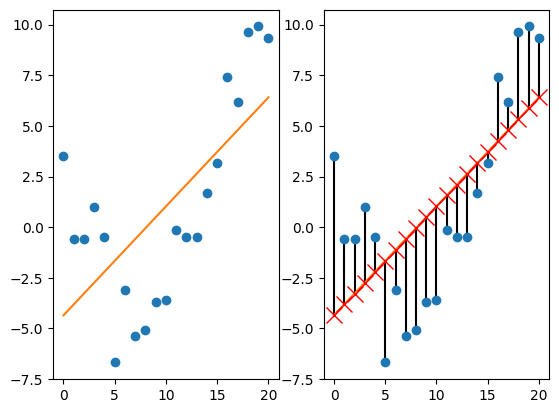

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

np.random.seed(0)
N = 21
x = np.linspace(0.0, 20, N)
X0 = x.reshape(N, 1)
X = np.c_[np.ones((N, 1)), X0]
w = np.array([-1.5, 1 / 9.0])
y = w[0] * x + w[1] * np.square(x)
y = y + np.random.normal(0, 1, N) * 2

w = np.linalg.lstsq(X, y, rcond=None)[0]
# print(w)
y_estim = np.dot(X, w)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X[:, 1], y, "o")
ax1.plot(X[:, 1], y_estim, "-")

for x0, y0, y_hat in zip(X[:, 1], y, y_estim):
    ax2.plot([x0, x0], [y0, y_hat], "k-")
ax2.plot(X[:, 1], y, "o")
ax2.plot(X[:, 1], y_estim, "-")
ax2.plot(X[:, 1], y_estim, "x", color="r", markersize=12);

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import rc
from scipy.special import expit

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

font = {'family' : 'monospace',
        'size'   : 24,
        'weight' : 'heavy'
       }

rc('font', **font)

%config InlineBackend.figure_formats = ['svg']

def plot_sigmoid(xmin, xmax, ymin, ymax):
    text_size = 24
    legend_size = 20
    eps=0.2
    fig, ax = plt.subplots(figsize=(11, 6))
    xs = np.linspace(xmin, xmax, num=500)
    
    
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    ax.text(xmax + eps, -.2, r"$x$", size=text_size)
    ax.text(0.1, ymax, r"$y$", size=text_size)
    
    arrow_fmt = dict(markersize=6, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
    ax.plot(xs, expit(xs), c='r', lw=3, label= r'$\sigma(x) = \frac{1}{1+e^{-x}}$')
    # plt.plot(xs, np.maximum(0.2*xs, xs), c='m', lw=3, label= r'$\mathrm{LReLU}(x)$')
    
    ax.plot([0, xmax], [1, 1], c='k', ls='--', lw=2)
    ax.plot([xmin, 0], [-1, -1], c='k', ls='--', lw=2)
    
    ax.text(-0.18, 0.05, r"0")
    
    ax.legend(fontsize=legend_size);
    ax.grid(ls=':')
    ax.set_xlim(xmin-eps, xmax+eps)
    ax.set_ylim(ymin - eps/2, ymax+eps/2)
    yticks = np.arange(ymin, ymax+1)
    xticks = np.arange(xmin, xmax+1)
    ax.set_yticks(yticks[yticks != 0]);
    ax.set_xticks(xticks[xticks != 0])
    ax.set_yticklabels(yticks[yticks != 0], size=legend_size)
    ax.set_xticklabels(xticks[xticks != 0], size=legend_size);

## Unsupervised learning

```{image} https://cdn-images-1.medium.com/max/1440/1*YUl_BcqFPgX49sSb5yrk3A.jpeg
:alt: unsupervised-learning
:class: bg-primary mb-1
:width: 500px
:align: center
```

 Unsupervised learning involves training a model on data that does not have labeled responses. The goal is to discover underlying patterns or structures in the data, such as grouping similar items together.

Examples of unsupervised learning tasks:
* clustering
* dimension reduction
* discovering latent factors
* searching for association rules

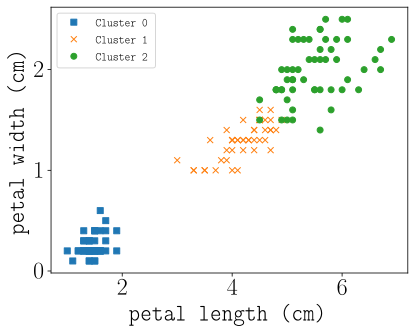

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

iris = load_iris()
X = iris.data

K = 3
idx1 = 2
idx2 = 3
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

colors = sns.color_palette()[0:K]
markers = ("s", "x", "o", "^", "v")
fig, ax = plt.subplots()
for k in range(0, K):
    ax.plot(
        X[y_pred == k, idx1],
        X[y_pred == k, idx2],
        color=colors[k],
        marker=markers[k],
        linestyle="None",
        label="Cluster {}".format(k),
    )
ax.set(xlabel=iris.feature_names[idx1])
ax.set(ylabel=iris.feature_names[idx2])
plt.legend(loc="upper left", fontsize=12)
plt.show()

## Semisupervised learning


```{image} https://cdn-images-1.medium.com/max/1600/1*0TUC4m6yB7HUuPNO2SXEBw.png
:alt: semisupervised-learning
:class: bg-primary mb-1
:width: 500px
:align: center
```

Semi-supervised learning comes into play when you have a dataset that contains both labeled and unlabeled data. Semi-supervised learning is often used in scenarios where obtaining labeled data is expensive, time-consuming, or otherwise challenging. 

## Reinforcement learning

```{figure} https://lilianweng.github.io/posts/2018-02-19-rl-overview/RL_illustration.png
:align: center
```

**Reinforcement learning** is a machine learning paradigm where an agent learns to make sequential decisions by interacting with an environment. It aims to maximize a cumulative reward signal by exploring actions and learning optimal strategies through trial and error.

<!--
## Exercises

1. **Accuracy** of a predictive model is calculated as

  $$
      \frac{\text{Number of correct predictions}}{\text{Total number of samples}}.
  $$

  Prove that accuracy equals one minus error rate {eq}`mis-rate`.

2. Suppose that training dataset has only one sample ($n=1$) and one feature. How would linear regression look like in this case? What if $n=2$? $n=3$?

3. Show that the binary cross-entropy loss {eq}`binary-cross-entropy` is a special case of the cross-entropy {eq}`cross-entropy`.

<!--
```{admonition} TODO
:class: warning
* Pictures from the internet is a temporary solution, try to create original ones
* Add a subsection about dummy model (move something from the next chapter if necessary)
* Write more about ML beyond supervised learning
```
-->